In [1]:
import os
import sys

In [2]:
print(os.getcwd())
sys.path.insert(0, os.path.join(os.getcwd(), '../'))

/home/haruyaishikawa/dev/RecordWithRS/python/notebook


In [3]:
import numpy as np
from datetime import datetime as dt
from utils import DataManagement

In [4]:
# setup which datetime to get
dm = DataManagement()
after = dt(2018, 7, 23, 14, 0, 0)
before = dt(2018, 7, 23, 14, 1, 0)
datetimes = dm.get_datetimes_in(after, before)

assert len(datetimes) == 1
datetime = datetimes[0]

In [5]:
data_path = dm.get_save_directory(datetime)
data_path = os.path.join(data_path, 'objects')

print(os.listdir(data_path))

['chair', 'cup', 'dining table', 'keyboard', 'laptop', 'person', 'traffic light']


In [6]:
ob_name = 'keyboard'
ob_path = os.path.join(data_path, ob_name)

In [7]:
files = os.listdir(ob_path)
filename = files[0]
csv_path = os.path.join(ob_path, filename)

In [8]:
np_pc = np.loadtxt(csv_path, delimiter=',')

In [9]:
np_pc.shape

(15569, 3)

In [10]:
pc = np.rollaxis(np_pc, 1)

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

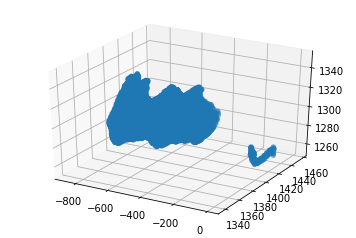

In [12]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[0], pc[1], pc[2])

plt.show()

<IPython.core.display.Javascript object>


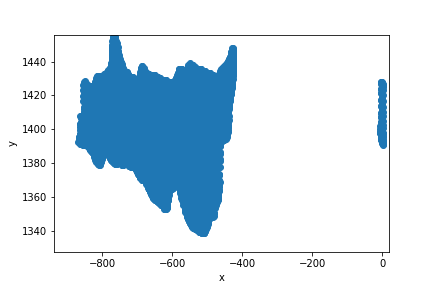

In [14]:
%matplotlib notebook

plt.scatter(pc[0], pc[1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()